In [1]:
%reset

In [2]:
import numpy as np
import scipy.fftpack as fftpack
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from tempfile import TemporaryFile

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop,Adam
from keras.layers import Embedding, TimeDistributed, RepeatVector, LSTM
from keras.utils import to_categorical

import cv2

Using TensorFlow backend.


In [3]:
age1= sio.loadmat('./age_big.mat')
path1=sio.loadmat('./path_big.mat')
data_age= age1['data_age']
data_path= path1['data_path']


In [6]:
# def vgg_16(weights_path=None):
#     model = Sequential()
#     model.add(ZeroPadding2D((1,1),input_shape=(256,6,3)))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))
# 
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))
# 
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(256, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(256, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(256, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))
# 
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(512, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(512, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(512, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))
# 
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(512, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(512, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(512, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))
# 
#     model.add(Flatten())
#     model.add(Dense(4096, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(4096, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation='softmax'))
# 
#     if weights_path:
#         model.load_weights(weights_path)
# 
#     return model


In [6]:
#image_model= vgg_16('vgg16_weights.h5')
image_model= Sequential()
base_model= VGG16(weights='imagenet',include_top=True)
for layers in base_model.layers[:22]:
    image_model.add(layers)

image_model.add(Dense(101,activation='softmax'))

image_model.compile(loss='mean_absolute_error', optimizer=RMSprop(lr=0.0001))

image_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [4]:
# def simple_cnn():
#     model= Sequential()
#     model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.5))
#     
#     model.add(Conv2D(64,(3,3),activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.5))
#     
#     model.add(Flatten())
#     model.add(Dense(256,activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(101,activation='softmax'))
#     
#     return model
#     
#     
#     

In [5]:
# image_model= simple_cnn()
# image_model.compile(loss='mean_absolute_error', optimizer=RMSprop(lr=0.001))
# image_model.summary()

NameError: name 'simple_cnn' is not defined

In [ ]:
train_ptr=20000
train_length=1000

for j in range(100):
    images=[]
    age=[]
    path=[]
    train_ptr= train_ptr+ train_length
    for i in range(train_ptr,train_ptr+train_length):
        str_1= ''.join(data_path[0,i])
        str_1='./imdb_crop/'+str_1
        str_1.replace(" \ "," / ")
        
        temp_age= data_age[0,i]
        # temp_age= new_age[i]
        data=plt.imread(str_1)
        
        img1= cv2.resize(data,(224,224))
        if img1.shape== (224,224,3):
            images.append(img1)
            age.append(temp_age)
        #print(len(images))    
    print("finished %d" % j)
    len1= 500
    
    train_image=np.asarray( images[:len1])
    test_image=np.asarray(images[len1: ])
    # print(train_image.shape)
    # temp1= train_image[0]
    # print(temp1.shape)
    # train_image=[]
    # test_image=[]
    # 
    # input_img= np.array(images)
    #  
    # in_r=input_img[:,:,:,0].reshape(-1,256,256)
    # in_g=input_img[:,:,:,1].reshape(-1,256,256)
    # in_b=input_img[:,:,:,2].reshape(-1,256,256)
    # # # input_imgs=[in_r,in_g,in_b]
    # input_img= np.concatenate((in_r,in_g,in_b),axis=0)
    # # # input_img=input_img.reshape(-1,256,256)
    # fft_image= fftpack.dct(input_img)
    # len0= len(images)
    # #processed_image= np.asarray(fft_image)
    # # #print(input_img.shape)
    # # #print(fft_image.shape)
    # for i in range(len1):
    #    temp=(fft_image[i, :, 0:20].reshape(256,20),fft_image[i + len0,:,0:20].reshape(256,20),fft_image[i + 2 * len0,:,0:20].reshape(256,20))
    #    
    #    temp=np.stack(temp,axis=2)
    #    train_image.append(temp)
    #     
    # for i in range(len1,len0):
    #     temp=(fft_image[i, :, 0:20].reshape(256,20),fft_image[i + len0,:,0:20].reshape(256,20),fft_image[i + 2 * len0,:,0:20].reshape(256,20))
    #     
    #     temp=np.stack(temp,axis=2)
    #     test_image.append(temp)
    #train_out=np.array(train_image)
    #test_out=np.array(test_image)
    #train_image= train_image.reshape(-1,256*18)
    #test_image=test_image.reshape(-1,256*18)
    # 
    #ica40= FastICA(n_components=40,max_iter=600)
    #train_out= ica40.fit_transform(train_image)
    #train_out= np.asanyarray(train_out)
    #test_out=ica40.transform(test_image)
    #test_out=np.asanyarray(test_out)
    age_train=age[:len1]
    age_test= age[len1:]
    # train_label=to_categorical(age_train,100)
    # train_label= np.asarray(age_train)
    train_label=[]
    x= np.linspace(0,100,101)
    for i in range(len1):
        mu= age_train[i]
        sigma= 10
        temp= np.exp(-(x-mu)**2/(2*sigma**2)) 
        temp= temp/ (sigma* np.sqrt(2* np.pi))
        train_label.append(temp)
    train_label=np.asarray(train_label)
    print(train_label.shape)
    image_model.fit(train_image, train_label,batch_size=1, epochs=1, verbose=0)
    
    
    y_test= np.asarray(age_test)
    test_out= image_model.predict(test_image,verbose=0)
    
    z= np.argmax(test_out,axis=1)
    # z= test_out
    count=0
    diff=[]
    for i in range(len(z)):
        temp= int(z[i])- int(age_test[i])
        diff.append(temp)
    # plt.hist(diff,bins=100)
    collect_0= [i for i in diff if abs(i)<5]
    collect_1= [i for i in diff if abs(i)<10]
    collect_2= [i for i in diff if abs(i)<15]
    collect_3= [i for i in diff if abs(i)<20]
    
    print(len(collect_0)/len(test_image))
    print(len(collect_1)/len(test_image))
    print(len(collect_2)/len(test_image))
    print(len(collect_3)/len(test_image))



finished 0
(500, 101)


0.08816120906801007
0.18639798488664988
0.3350125944584383
0.7632241813602015


finished 1
(500, 101)


0.0446927374301676
0.1005586592178771
0.3128491620111732
0.5642458100558659


finished 2
(500, 101)


0.5170940170940171
0.7393162393162394
0.9123931623931624
0.9957264957264957


finished 3
(500, 101)


0.06818181818181818
0.11818181818181818
0.30227272727272725
0.6295454545454545


finished 4
(500, 101)


0.31806615776081426
0.7150127226463104
0.8295165394402035
0.905852417302799


finished 5
(500, 101)


0.16233766233766234
0.43073593073593075
0.6406926406926406
0.8268398268398268


finished 6
(500, 101)


0.0
0.021447721179624665
0.15013404825737264
0.36193029490616624


finished 7
(500, 101)


0.39349112426035504
0.8964497041420119
0.9526627218934911
0.9674556213017751


finished 8
(500, 101)


0.5279069767441861
0.9209302325581395
0.9953488372093023
0.9953488372093023


finished 9
(500, 101)


0.2824858757062147
0.4971751412429379
0.6101694915254238
0.7401129943502824


[4.43184841e-04 5.95253242e-04 7.91545158e-04 1.04209348e-03
 1.35829692e-03 1.75283005e-03 2.23945303e-03 2.83270377e-03
 3.54745928e-03 4.39835960e-03 5.39909665e-03 6.56158148e-03
 7.89501583e-03 9.40490774e-03 1.10920835e-02 1.29517596e-02
 1.49727466e-02 1.71368592e-02 1.94186055e-02 2.17852177e-02
 2.41970725e-02 2.66085250e-02 2.89691553e-02 3.12253933e-02
 3.33224603e-02 3.52065327e-02 3.68270140e-02 3.81387815e-02
 3.91042694e-02 3.96952547e-02 3.98942280e-02 3.96952547e-02
 3.91042694e-02 3.81387815e-02 3.68270140e-02 3.52065327e-02
 3.33224603e-02 3.12253933e-02 2.89691553e-02 2.66085250e-02
 2.41970725e-02 2.17852177e-02 1.94186055e-02 1.71368592e-02
 1.49727466e-02 1.29517596e-02 1.10920835e-02 9.40490774e-03
 7.89501583e-03 6.56158148e-03 5.39909665e-03 4.39835960e-03
 3.54745928e-03 2.83270377e-03 2.23945303e-03 1.75283005e-03
 1.35829692e-03 1.04209348e-03 7.91545158e-04 5.95253242e-04
 4.43184841e-04 3.26681906e-04 2.38408820e-04 1.72256894e-04
 1.23221917e-04 8.726826

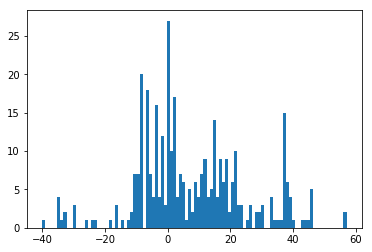

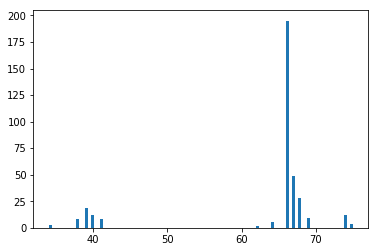

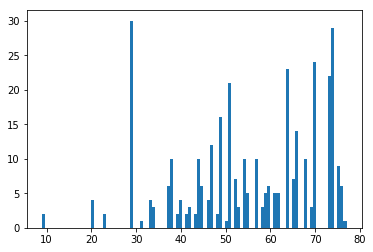

In [8]:
diff=[]
for i in range(len(z)):
    temp= int(z[i])- int(y_test[i])
    diff.append(temp)
hista= plt.hist(diff,bins=100)
plt.figure()
histb= plt.hist(z,bins=100)
plt.figure()
histc= plt.hist(y_test,bins=100)
#print(train_label[0],"trainlabel")
#print(age_train)
#print(np.argmax(train_label,axis=1))
print(test_out.shape)
#print(np.argmax(test_out,axis=1))

(224, 224, 3)
real age 33
predict age 46


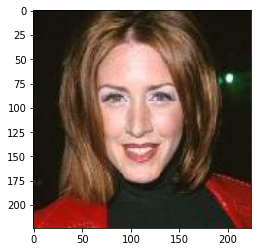

In [30]:
index= 150001
path= data_path[0,index]
age= data_age[0,index]

str_1= ''.join(path)
str_1='./imdb_crop/'+str_1
str_1.replace(" \ "," / ")

data=plt.imread(str_1)
        
img1= cv2.resize(data,(224,224))
plt.imshow(img1)
img1.reshape(224,224,3)
print(img1.shape)
imgs=np.asarray([img1])
out= image_model.predict(imgs)
z= np.argmax(out)

print("real age %d" %age)
print("predict age %d" % z)
